In [13]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [14]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns=['One','Two','Three'])
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [15]:
# 行方向に計算するので列の合計となる
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [16]:
# 行の合計を求める
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [17]:
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [18]:
# 最小値を持つindex
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [19]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [20]:
# 累積
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [21]:
# DataFrameの全体像
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [22]:
# 株価のデータで共分散と相関をみる
# Pandasはwebからデータを取得することも可能
from pandas_datareader import DataReader
import datetime
# 米国Yahooのサービスを使って、株価を取得する
# すべて石油関連会社
# CVX シェブロン、XOM エクソンモービル、BP 英BP

In [23]:
prices = DataReader(['CVX','XOM','BP'],'yahoo',
                             start=datetime.datetime(2010,1,1),
                             end=datetime.datetime(2013,1,1))['Adj Close']
prices.head()
                                            


Symbols,BP,CVX,XOM
Date,,,
2009-12-31,35.024239,53.552139,49.951328
2010-01-04,35.737183,54.991985,50.654552
2010-01-05,35.990925,55.381500,50.852329
2010-01-06,36.178230,55.388470,51.291859
2010-01-07,36.166138,55.179783,51.130695


In [24]:
# 出来高(何株売買されたか)のデータ
volume = DataReader(['CVX','XOM','BP'],'yahoo',
                             start=datetime.datetime(2010,1,1),
                             end=datetime.datetime(2013,1,1))['Volume']
volume.head()


Symbols,BP,CVX,XOM
Date,,,
2009-12-31,1517600.0,4246600.0,18852300.0
2010-01-04,3956100.0,10173800.0,27809100.0
2010-01-05,4109600.0,10593700.0,30174700.0
2010-01-06,6227900.0,11014600.0,35044700.0
2010-01-07,4431300.0,9626900.0,27192100.0


In [25]:
# 変化の割合
rets = prices.pct_change()

In [26]:
rets.head()

Symbols,BP,CVX,XOM
Date,,,
2009-12-31,NaN,NaN,NaN
2010-01-04,0.020356,0.026887,0.014078
2010-01-05,0.007100,0.007083,0.003904
2010-01-06,0.005204,0.000126,0.008643
2010-01-07,-0.000334,-0.003768,-0.003142


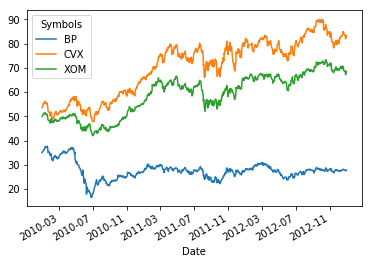

In [27]:
# 単純な株価の変化を描画
%matplotlib inline
prices.plot()

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

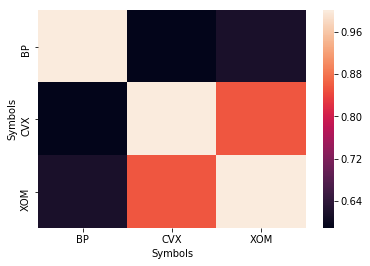

In [29]:
sns.heatmap(rets.corr())

In [30]:
ser1 = Series(['w','w','x', 'y', 'z' ,'w' ,'w' ,'x' ,'x' ,'y' ,'a' ,'z'])
ser1

0     w
1     w
2     x
3     y
4     z
5     w
6     w
7     x
8     x
9     y
10    a
11    z
dtype: object

In [31]:
ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [32]:
ser1.value_counts()

w    4
x    3
z    2
y    2
a    1
dtype: int64